### SYSTEM TEMPERATURE

Average Temperature: 294.81 K
Temperature Fluctuation (Standard Deviation): 18.26 K


/tmp/ipykernel_16456/1033924732.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


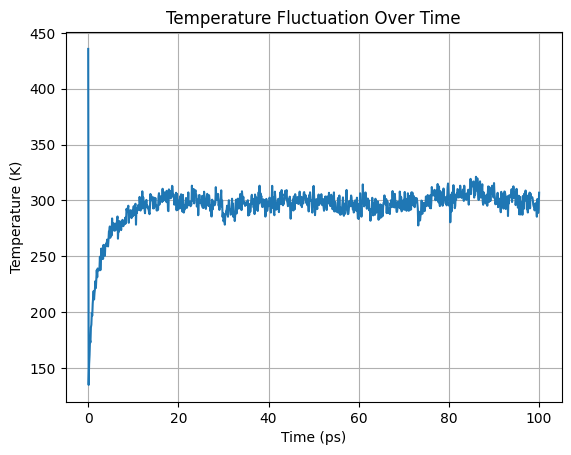

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
input_file_path = '/mnt/newsitt/topic1/slab/temp.xvg'  # Path to your input .xvg file
cleaned_file_path = '/mnt/newsitt/topic1/slab/cleaned_temp.xvg'  # Path to save the cleaned file
expected_columns = 2  # Expected number of columns (e.g., Time and Temperature)

# Step 1: Preprocess the .xvg file to filter irregular rows
clean_lines = []

with open(input_file_path, 'r') as file:
    for line in file:
        # Skip comment or header lines
        if line.startswith(('@', '#')):
            continue
        # Check column count
        columns = line.split()
        if len(columns) == expected_columns:
            clean_lines.append(line)

# Save cleaned data to a new file
with open(cleaned_file_path, 'w') as cleaned_file:
    cleaned_file.writelines(clean_lines)

# Step 2: Load the cleaned file
data = pd.read_csv(
    cleaned_file_path,
    delim_whitespace=True,
    names=['Time', 'Temperature']  # Adjust column names as needed
)

# Step 3: Calculate the average temperature and fluctuation
average_temperature = data['Temperature'].mean()
fluctuation_parameter = data['Temperature'].std()  # Standard deviation

# Print results
print(f"Average Temperature: {average_temperature:.2f} K")
print(f"Temperature Fluctuation (Standard Deviation): {fluctuation_parameter:.2f} K")

# Step 4: Plot temperature vs. time
plt.plot(data['Time'], data['Temperature'])
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Fluctuation Over Time')
plt.grid()
plt.show()


### POTENTIAL ENERGY

Average Potential Energy: 1999448.43 kJ/mol
Potential Energy Fluctuation (Standard Deviation): 363.31 kJ/mol


/tmp/ipykernel_16456/192902163.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


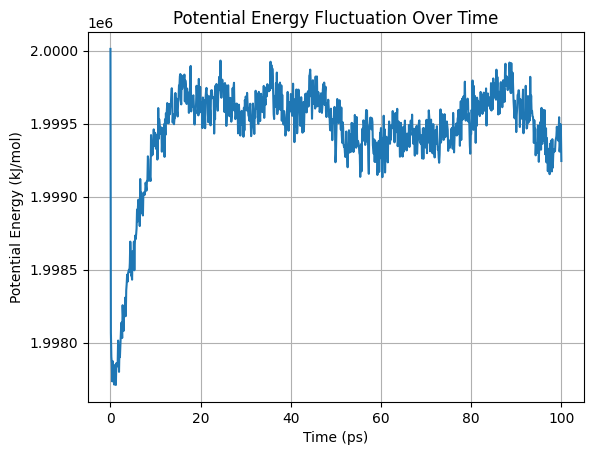

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
input_file_path = '/mnt/newsitt/topic1/slab/ep.xvg'  # Path to your input .xvg file
cleaned_file_path = '/mnt/newsitt/topic1/slab/cleaned_ep.xvg'  # Path to save the cleaned file
expected_columns = 2  # Expected number of columns (e.g., Time and Potential Energy)

# Step 1: Preprocess the .xvg file to filter irregular rows
clean_lines = []

with open(input_file_path, 'r') as file:
    for line in file:
        # Skip comment or header lines
        if line.startswith(('@', '#')):
            continue
        # Check column count
        columns = line.split()
        if len(columns) == expected_columns:
            clean_lines.append(line)

# Save cleaned data to a new file
with open(cleaned_file_path, 'w') as cleaned_file:
    cleaned_file.writelines(clean_lines)

# Step 2: Load the cleaned file
data = pd.read_csv(
    cleaned_file_path,
    delim_whitespace=True,
    names=['Time', 'Potential_Energy']  # Adjust column names as needed
)

# Step 3: Calculate the average potential energy and fluctuation
average_potential_energy = data['Potential_Energy'].mean()
fluctuation_parameter = data['Potential_Energy'].std()  # Standard deviation

# Print results
print(f"Average Potential Energy: {average_potential_energy:.2f} kJ/mol")
print(f"Potential Energy Fluctuation (Standard Deviation): {fluctuation_parameter:.2f} kJ/mol")

# Step 4: Plot potential energy vs. time
plt.plot(data['Time'], data['Potential_Energy'])
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (kJ/mol)')
plt.title('Potential Energy Fluctuation Over Time')
plt.grid()
plt.show()


### Density

In [9]:
import MDAnalysis as mda
from MDAnalysis.analysis.density import density_from_Universe

# Load system
u = mda.Universe('/mnt/newsitt/topic1/slab/nvt.gro', '/mnt/newsitt/topic1/slab/nvt.xtc')

# Compute density
density = density_from_Universe(u, delta=0.1)

# Plot density profile along Z-axis
plt.plot(density.grid[2], density.values.mean(axis=(0, 1)))
plt.xlabel('Z-axis (nm)')
plt.ylabel('Density (kg/m^3)')
plt.title('Density Profile Along Z-axis')
plt.grid()
plt.show()

TypeError: DensityAnalysis.__init__() got an unexpected keyword argument 'atom_selection'